## CSE 158/258, Fall 2022: Homework 1

In [1]:
import json
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn import linear_model, metrics
import numpy as np
import random
import gzip
import math
from sklearn import svm # Library for SVM classification
import ast 

In [2]:
def assertFloat(x): # Checks that an answer is a float
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [3]:
f = gzip.open("young_adult_10000.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [4]:
# len(dataset)

In [5]:
answers = {} # Put your answers to each question in this dictionary

In [6]:
# dataset[14]

### Question 1

In [7]:
def feature(datum):
    # your implementation
    feat = [1,datum['review_text'].count('!')]
    return feat

In [8]:
X = [feature(x) for x in dataset]
Y = [y['rating'] for y in dataset] # rating we are trying to predict

In [9]:
theta,residuals,rank,s = np.linalg.lstsq(X, Y)
theta0, theta1 = theta[0], theta[1]
mse = ((Y - np.dot(X, theta))**2).mean()

/var/folders/05/xmcglcvx5mn55bpwbs2f7kdw0000gn/T/ipykernel_6094/1466874304.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X, Y)


In [10]:
answers['Q1'] = [theta0, theta1, mse]

In [11]:
assertFloatList(answers['Q1'], 3) # Check the format of your answer (three floats)

### Question 2

In [12]:
def feature(datum):
    feat = [1,len(datum['review_text']), datum['review_text'].count('!')]
    return feat

In [13]:
X = [feature(x) for x in dataset]
Y = [y['rating'] for y in dataset] # rating we are trying to predict
theta,residuals,rank,s = np.linalg.lstsq(X, Y)
theta0, theta1, theta2 = theta[0], theta[1], theta[2]
mse = ((Y - np.dot(X, theta))**2).mean()

/var/folders/05/xmcglcvx5mn55bpwbs2f7kdw0000gn/T/ipykernel_6094/2353218757.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X, Y)


In [14]:
answers['Q2'] = [theta0, theta1, theta2, mse]

In [15]:
assertFloatList(answers['Q2'], 4)

### Question 3

In [16]:
def feature(datum, deg):
    # feature for a specific polynomial degree
    ft = datum['review_text'].count('!')
    feat = [1]
    for i in range(1,deg+1): 
        feat.append(ft**i)
    return feat

In [17]:
Y = [y['rating'] for y in dataset] # rating we are trying to predict

In [18]:
mses = []
for i in range(1,6):
    X =[feature(x,i) for x in dataset]
    theta,residuals,rank,s = np.linalg.lstsq(X, Y)
    mses.append(((Y - np.dot(X, theta))**2).mean())

/var/folders/05/xmcglcvx5mn55bpwbs2f7kdw0000gn/T/ipykernel_6094/4133718827.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X, Y)


In [19]:
answers['Q3'] = mses

In [20]:
assertFloatList(answers['Q3'], 5)# List of length 5

### Question 4

In [21]:
train_data = dataset[:len(dataset)//2]
test_data = dataset[len(dataset)//2:]
train_Y = [y['rating'] for y in train_data]
test_Y = [y['rating'] for y in test_data]
mses = []
for i in range(1,6):
    # use train data
    train_X =[feature(x,i) for x in train_data]
    theta,residuals,rank,s = np.linalg.lstsq(train_X, train_Y)
    
    #mse on test data
    test_X =[feature(x,i) for x in test_data]
    mses.append(((test_Y - np.dot(test_X, theta))**2).mean())
#     print(type(theta))

/var/folders/05/xmcglcvx5mn55bpwbs2f7kdw0000gn/T/ipykernel_6094/419178920.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(train_X, train_Y)


In [22]:
answers['Q4'] = mses

In [23]:
assertFloatList(answers['Q4'], 5)

### Question 5

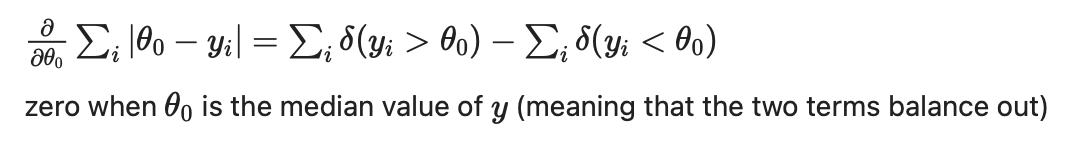

In [24]:
theta = np.median(np.array(train_Y))
mae = np.absolute((test_Y - theta)).mean() #0.907

In [25]:
answers['Q5'] = mae

In [26]:
assertFloat(answers['Q5'])

### Question 6

In [27]:
f = open("beer_50000.json")
dataset = []
for l in f:
    if 'user/gender' in l:
        dataset.append(eval(l))

In [28]:
len(dataset)

20403

In [29]:
def feature(datum):
    feat = [1,datum['review/text'].count('!')]
    return feat

In [30]:
# train_data = dataset[:len(dataset)//2]
# test_data = dataset[len(dataset)//2:]

# X_train = [feature(x) for x in train_data]
# y_train = [y['user/gender'] == 'Female' for y in train_data]

# X_test = [feature(x) for x in test_data]
# y_test = [y['user/gender'] == 'Female' for y in test_data]

X = [feature(x) for x in dataset]
y = [y['user/gender'] == 'Female' for y in dataset]

In [31]:
mod = linear_model.LogisticRegression()
mod.fit(X,y)

LogisticRegression()

In [32]:
predictions = mod.predict(X)

In [33]:
TP = sum([(p and l) for (p,l) in zip(predictions, y)])
FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

In [34]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
BER = 1 - 0.5*(TPR + TNR) #balanced Error Rate 

In [35]:
answers['Q6'] = [TP, TN, FP, FN, BER]

In [36]:
assertFloatList(answers['Q6'], 5)

### Question 7

In [37]:
mod = linear_model.LogisticRegression(C=1.0, class_weight = 'balanced')
mod.fit(X,y)

LogisticRegression(class_weight='balanced')

In [38]:
predictions = mod.predict(X)

In [39]:
TP = sum([(p and l) for (p,l) in zip(predictions, y)])
FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

In [40]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
BER = 1 - 0.5*(TPR + TNR) #balanced Error Rate 

In [41]:
answers["Q7"] = [TP, TN, FP, FN, BER]

In [42]:
assertFloatList(answers['Q7'], 5)

### Question 8

In [43]:
K = [1, 10, 100, 1000, 10000]
precisionList = []
for k in K: 
    mod = linear_model.LogisticRegression(C=k, class_weight = 'balanced')
    mod.fit(X,y)
    pred = mod.predict(X)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN) 
    precisionList.append(precision)

In [44]:
answers['Q8'] = precisionList

In [45]:
assertFloatList(answers['Q8'], 5) #List of five floats

In [46]:
f = open("answers_hw1.txt", 'w') # Write your answers to a file
f.write(str(answers) + '\n')
f.close()